# Heart Disease Prediction
###  ``Comparing ML models``
- **Linear Regression**
- **KNN(K-Nearest Neighbors)**
- **Logistic Regression**
- **Decision Tree** 
-  **Random Forest**
-  **SVM(support vector machine)**

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Data

In [2]:
df=pd.read_csv("Heart Disease Dataset.csv")

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Exploratory Data Analysis

In [4]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

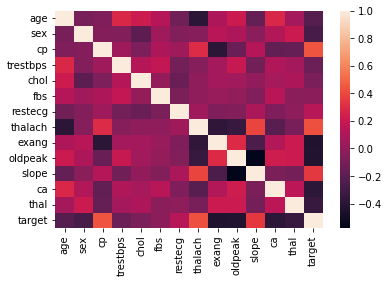

In [5]:
sns.heatmap(df.corr())

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Data Cleaning

In [9]:
p = df.drop(['target'], axis=1)
q = df['target']

In [10]:
from sklearn.preprocessing import MinMaxScaler
pq = MinMaxScaler().fit_transform(p)

In [11]:
q.value_counts()

1    165
0    138
Name: target, dtype: int64

In [12]:
from imblearn.over_sampling import RandomOverSampler

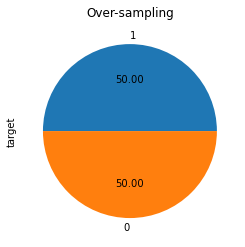

In [13]:
ros = RandomOverSampler(sampling_strategy=1) #sampling_strategy=1 to be the same percentage
X, y = ros.fit_resample(pq, q)

ax = y.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [14]:
y.value_counts()

1    165
0    165
Name: target, dtype: int64

### Spliting Data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=100)

## Using Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
print(lm.intercept_)

0.704025267775491


In [21]:
coeff_df = pd.DataFrame(lm.coef_,p.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,0.042733
sex,-0.224837
cp,0.438967
trestbps,-0.219301
chol,-0.207452
fbs,-0.013018
restecg,0.072373
thalach,0.377488
exang,-0.084430
oldpeak,-0.301364


In [22]:
predictions1 = lm.predict(X_test)

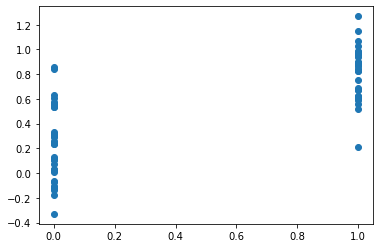

In [23]:
plt.scatter(y_test,predictions1)

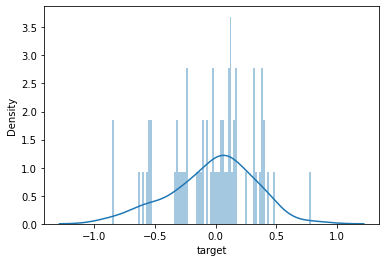

In [24]:
sns.distplot((y_test-predictions1),bins=100);

In [25]:
lm.score(X_test,y_test)

0.5541596676338341

### Linear Regression - 55%

## Using KNN

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit(df.drop('target',axis=1))

StandardScaler()

In [29]:
scaled_features = scaler.transform(df.drop('target',axis=1))

In [30]:
df = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


Training

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)

In [33]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [34]:
prediction2 = knn.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(confusion_matrix(y_test,prediction2))

[[26  8]
 [ 7 25]]


In [37]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78        34
           1       0.76      0.78      0.77        32

    accuracy                           0.77        66
   macro avg       0.77      0.77      0.77        66
weighted avg       0.77      0.77      0.77        66



In [38]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

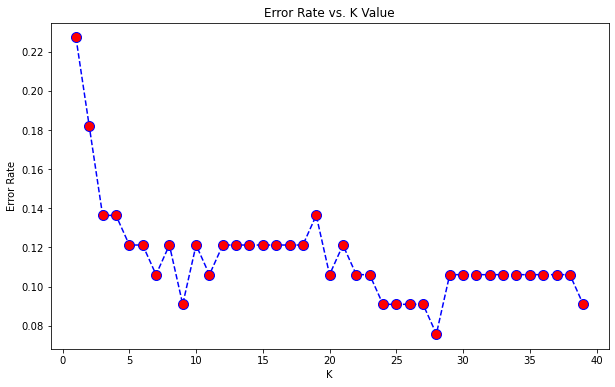

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [40]:
# NOW WITH K=28
knn = KNeighborsClassifier(n_neighbors=28)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=28')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=28


[[31  3]
 [ 2 30]]


              precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.91      0.94      0.92        32

    accuracy                           0.92        66
   macro avg       0.92      0.92      0.92        66
weighted avg       0.92      0.92      0.92        66



### KNN - 92%

## Using Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [43]:
prediction3 = logmodel.predict(X_test)

In [45]:
print(confusion_matrix(y_test,prediction3))
print('\n')
print(classification_report(y_test,prediction3))

[[27  7]
 [ 2 30]]


              precision    recall  f1-score   support

           0       0.93      0.79      0.86        34
           1       0.81      0.94      0.87        32

    accuracy                           0.86        66
   macro avg       0.87      0.87      0.86        66
weighted avg       0.87      0.86      0.86        66



### Logistic Regression - 86%

## Using Decision Trees

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtree = DecisionTreeClassifier()

In [48]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
prediction4 = dtree.predict(X_test)

In [51]:
print(confusion_matrix(y_test,prediction4))
print('\n')
print(classification_report(y_test,prediction4))

[[27  7]
 [ 2 30]]


              precision    recall  f1-score   support

           0       0.93      0.79      0.86        34
           1       0.81      0.94      0.87        32

    accuracy                           0.86        66
   macro avg       0.87      0.87      0.86        66
weighted avg       0.87      0.86      0.86        66



## Decision Trees 86%

## Using Random Forests

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=120)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=120)

In [61]:
prediction5 = rfc.predict(X_test)

In [63]:
print(confusion_matrix(y_test,prediction5))
print('\n')
print(classification_report(y_test,prediction5))

[[29  5]
 [ 1 31]]


              precision    recall  f1-score   support

           0       0.97      0.85      0.91        34
           1       0.86      0.97      0.91        32

    accuracy                           0.91        66
   macro avg       0.91      0.91      0.91        66
weighted avg       0.92      0.91      0.91        66



### Random Forests 91%

## Using SVM

In [64]:
from sklearn.svm import SVC

In [65]:
model = SVC()

In [66]:
model.fit(X_train,y_train)

SVC()

In [67]:
predictions = model.predict(X_test)

In [80]:
print(confusion_matrix(y_test,predictions))

[[29  5]
 [ 3 29]]


In [81]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        34
           1       0.85      0.91      0.88        32

    accuracy                           0.88        66
   macro avg       0.88      0.88      0.88        66
weighted avg       0.88      0.88      0.88        66



### SVM 88%

## Comparing ML Models

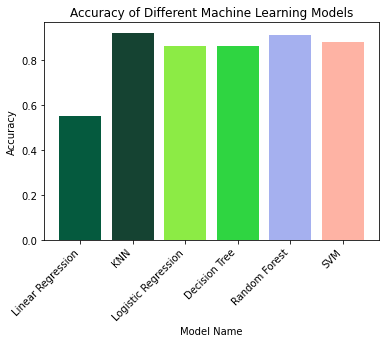

In [82]:
import random
model_accuracies = {'Linear Regression':0.55,
                    'KNN': 0.92,
                    'Logistic Regression': 0.86,  
                    'Decision Tree': 0.86, 
                    'Random Forest': 0.91,
                    'SVM': 0.88}
model_names = list(model_accuracies.keys())
model_values = list(model_accuracies.values())
colors = [np.random.rand(3,) for i in range(len(model_names))]
plt.bar(model_names, model_values, color=colors)
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Machine Learning Models')
plt.xticks(rotation=45, ha='right')
plt.show()

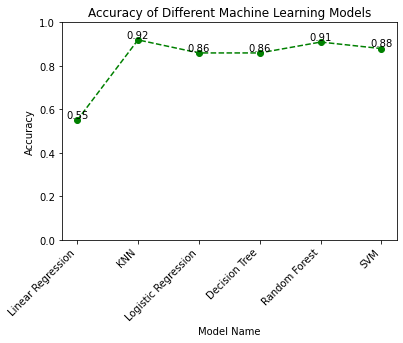

In [83]:
model_accuracies = {'Linear Regression':0.55,
                    'KNN': 0.92,
                    'Logistic Regression': 0.86,  
                    'Decision Tree': 0.86, 
                    'Random Forest': 0.91,
                    'SVM': 0.88}
model_names = list(model_accuracies.keys())
model_values = list(model_accuracies.values())

plt.plot(model_names, model_values, 'o--', color="green")

for i, model_value in enumerate(model_values):
    plt.text(i, model_value, f'{model_value:.2f}', ha='center', va='bottom')

plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Machine Learning Models')
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')
plt.ylim([0, 1])
plt.show()


## Conclusion

- **KNN** has the highest accuracy at **92%**, making it the best performing model in this group.
- **Random Forest and SVM** have high accuracy values, with **91%** and **88%** respectively, making them good performing models as well.
- **Logistic Regression and Decision Tree** have the same accuracy values of **86**, indicating they perform similarly in this context.
- **Linear Regression** has the lowest accuracy value of **55**, making it the least performing model in this group.


It's important to note that accuracy is just one metric for evaluating machine learning models and other factors such as model complexity, computational efficiency, and the specific task at hand should also be considered when selecting a model.

------------